## Capstone Project Submission

* Student name: Vikas Bansal
* Student pace: part time
* Instructor name: Lindsey Berlin


## Convolutional Neural Network Classification Model:


My intent with this project was to build a simple deep learning neural network that would be capable of performing binary classification on Chest X-Ray Images s from Kaggle.com. I had to import a module that would serve as an operating system interface from python in the form of os in order to interact directly with the directories located on my computer. Keras was used extensively in this project in order to make use of all of its deep learning capabilities. Numpy was used in the manipulation of images in the form of arrays. Pandas and Matplotlib, were utilized in the exploratory phase of this project in order to visualize the data.

I started with importing the necessary modules and libraries needed for this project. I then went ahead and performed the rudimentary data exploration phase by reading in some images as examples of what the data looks like.  I then went ahead and created simple histograms and pie charts comparing people with and without pneumonia lung disease in each of the 3 directories (train, test, and val). Arguably, the most difficult part of this project was constructing the deep learning convolutional neural network to classify the images. I played around with certain parameters in terms of batch size and epochs. There were a lot of moving pieces when it came to initializing this model in order to make it the most efficient possible. I made use of sigmoid and relu activation functions.In conclusion, I would say that the models turned out unsatisfactory for the use case, and I'd like expand on this work in the future and see if there is any way I could descrease the loss at all and increase the accuracy.


## Methodology

We will adopt the workflow as listed below:

1. Obtain (import the data from kaggle's Competition Page)
2. Scrub (clean the data, deal with missing values and data types) (Refer to the EDA Notebook)
3. Convert the DCIM Image data to jpg (Refer to the jpg conversion notebook)
3. Explore (answer descriptives questions using EDA) (Refer to the EDA Notebook)
4. Modeling (build our predictive models)
5. Interpret (comment on our model and findings)

Data Files Information (From Kaggle Competiiton Page)

* train_study_level.csv - the train study-level metadata, with one row for each study, including correct labels.
* train_image_level.csv - the train image-level metadata, with one row for each image, including both correct labels and any bounding boxes in a dictionary format. Some images in both test and train have multiple bounding boxes.


In [1]:
#pip install tqdm

In [2]:
#pip install pydicom

In [3]:
#pip install colorama

### Importing all Necessary Libraries

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import DataFrame
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import cv2


import os

from PIL import Image
import pandas as pd
from tqdm.auto import tqdm
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut



#from pydicom import dcmread

from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, average_precision_score, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [5]:
import gc
from colorama import Fore, Back, Style

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
c_ = Fore.CYAN
res = Style.RESET_ALL


Lets load the data to Dataframes.

In [6]:
image_df = pd.read_csv('train_image_level.csv', index_col=None)
study_df = pd.read_csv('train_study_level.csv', index_col=None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
print(f"{y_}Train image level csv shape : {image_df.shape}{res}\n{g_}Train study level csv shape : {study_df.shape}{res}")

Train image level csv shape : (6334, 4)
Train study level csv shape : (6054, 5)


In [7]:
#Preview Study Dataframe
study_df

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1
...,...,...,...,...,...
6049,ffcb4630f46f_study,0,1,0,0
6050,ffe4d6e8fbb0_study,0,1,0,0
6051,ffe94fcb14fa_study,0,1,0,0
6052,ffebf1ef4a9c_study,0,1,0,0


In [8]:
#Preview Image Dataframe
image_df

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]",opacity 1 789.28836 582.43035 1815.94498 2499.73327 opacity 1 2245.91208 591.20528 3340.5737 2352.75472,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]",opacity 1 677.42216 197.97662 1545.21983 1197.75876 opacity 1 1792.69064 402.5525 2409.71798 1606.9105,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.00012, 'height': 604}]",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'height': 1106}, {'x': 2578.56661, 'y': 998.66667, 'width': 662.66667, 'height': 1120}]",opacity 1 623.23328 1050 1337.23328 2156 opacity 1 2578.56661 998.66667 3241.23328 2118.66667,dfd9fdd85a3e
...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 316.41699, 'height': 451.63758}, {'x': 2375.87717, 'y': 1830.89015, 'width': 267.7373, 'height': 305.59912}, {'x': 707.25199, 'y': 722.07926, 'width': 392.14044, 'height': 849.18683}]",opacity 1 2197.38566 841.07361 2513.80265 1292.71119 opacity 1 2375.87717 1830.89015 2643.6144700000004 2136.48927 opacity 1 707.25199 722.07926 1099.3924299999999 1571.26609,7eed9af03814
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 1496.25016, 'height': 2604.58334}, {'x': 1005.8125, 'y': 1584.67711, 'width': 662.22913, 'height': 775.83337}]",opacity 1 2729.27083 332.26044 4225.52099 2936.84378 opacity 1 1005.8125 1584.67711 1668.0416300000002 2360.51048,a0cb0b96fb3d


Even though we did some EDA earlier on, Lets visualize the Study_df Dataframe in a pivot table, in order to see what labels we have. 

In [9]:
study_grp = pd.melt(study_df, id_vars=list(study_df.columns)[:1], value_vars=list(study_df.columns)[1:],
             var_name='label', value_name='value')
study_grp = study_grp.loc[study_grp['value']!=0]
colors = {'Typical Appearance' : '#DCD427',
'Negative for Pneumonia' : '#0092CC',
'Indeterminate Appearance' : '#CC3333',
#'Atypical Appearance' : '#779933',
          'Atypical Appearance' : '#E6E6E6'
         }

study_grp = study_grp.groupby('label').sum().sort_values('value',ascending=False).reset_index()
study_grp['color'] = study_grp['label'].apply(lambda x: colors[x])
study_grp

,label,value,color
0,Typical Appearance,2855,#DCD427
1,Negative for Pneumonia,1676,#0092CC
2,Indeterminate Appearance,1049,#CC3333
3,Atypical Appearance,474,#E6E6E6


In [11]:
# Merging study_level and image_level
# rename id column in study_level to StudyInstanceUID
study_df.rename(columns = {'id':'StudyInstanceUID'}, inplace = True)

# remove _study from StudyInstanceUID
study_df['StudyInstanceUID'] = study_df['StudyInstanceUID'].str.replace('_study', '')

# merge
df_train = pd.merge(image_df, study_df, on='StudyInstanceUID')

# remove _image from id column
df_train['id'] = df_train['id'].str.replace('_image', '')

# rename id column as imageID
df_train.rename(columns = {'id':'imageID'}, inplace = True)

# renaming target columns
df_train.rename(columns = {'Negative for Pneumonia':'negative'}, inplace = True)
df_train.rename(columns = {'Typical Appearance':'typical'}, inplace = True)
df_train.rename(columns = {'Indeterminate Appearance':'indeterminate'}, inplace = True)
df_train.rename(columns = {'Atypical Appearance':'atypical'}, inplace = True)

# Create a new target column
categories = ['negative','typical','indeterminate','atypical']
df = df_train[categories]
df_train["target"] = pd.Series(df.columns[np.where(df!=0)[1]])
df_train.head()

,imageID,boxes,label,StudyInstanceUID,negative,typical,indeterminate,atypical,target
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]",opacity 1 789.28836 582.43035 1815.94498 2499.73327 opacity 1 2245.91208 591.20528 3340.5737 2352.75472,5776db0cec75,0,1,0,0,typical
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,negative
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]",opacity 1 677.42216 197.97662 1545.21983 1197.75876 opacity 1 1792.69064 402.5525 2409.71798 1606.9105,9d514ce429a7,0,1,0,0,typical
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.00012, 'height': 604}]",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1,atypical
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'height': 1106}, {'x': 2578.56661, 'y': 998.66667, 'width': 662.66667, 'height': 1120}]",opacity 1 623.23328 1050 1337.23328 2156 opacity 1 2578.56661 998.66667 3241.23328 2118.66667,dfd9fdd85a3e,0,1,0,0,typical


Lets Import the X-Ray jpg images from the local folders. 

In [12]:
train_jpg_directory = "/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train"
test_jpg_directory = "/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/test"

def getImagePaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names

train_images_path = getImagePaths(train_jpg_directory)
test_images_path = getImagePaths(test_jpg_directory)

print(f"{y_}Number of train images: {g_} {len(train_images_path)}\n")
print(f"{y_}Number of test images: {g_} {len(test_images_path)}\n")

def getShape(data, images_paths):
    shape = cv2.imread(images_paths[0]).shape
    for image_path in images_paths:
        image_shape=cv2.imread(image_path).shape
        if (image_shape!=shape):
            return data +" - Different image shape"
        else:
            return data +" - Same image shape " + str(shape)

Number of train images:  6334

Number of test images:  1263



In [13]:
getShape('train',train_images_path)

'train - Same image shape (256, 256, 3)'

In [14]:
getShape('test',test_images_path)

'test - Same image shape (256, 256, 3)'

In [15]:
df_train_images = DataFrame(train_images_path,columns=['train_images_path'])

We need to get a dataframe which has the imageID, Image Name, and the path. For this, lets use the slicer function to get the image ID and image Name from the Image Path Column

In [16]:
df_train_images['imageID'] = df_train_images['train_images_path'].str.slice(98,110)
df_train_images['Image_Name'] = df_train_images['train_images_path'].str.slice(98,114)
df_train_images

,train_images_path,imageID,Image_Name
0,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/d3ab6de09006.jpg,d3ab6de09006,d3ab6de09006.jpg
1,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/cb308b57472a.jpg,cb308b57472a,cb308b57472a.jpg
2,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/503563d744a1.jpg,503563d744a1,503563d744a1.jpg
3,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/bfb1ffabaaff.jpg,bfb1ffabaaff,bfb1ffabaaff.jpg
4,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ea56a7479090.jpg,ea56a7479090,ea56a7479090.jpg
...,...,...,...
6329,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/36625db2640a.jpg,36625db2640a,36625db2640a.jpg
6330,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/2b97a6619f32.jpg,2b97a6619f32,2b97a6619f32.jpg
6331,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/68bc7bc6ad65.jpg,68bc7bc6ad65,68bc7bc6ad65.jpg
6332,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/6713c2b6c0a6.jpg,6713c2b6c0a6,6713c2b6c0a6.jpg


In [17]:
df_train_final = pd.merge(df_train,df_train_images, on='imageID')

In [18]:
df_train_final

,imageID,boxes,label,StudyInstanceUID,negative,typical,indeterminate,atypical,target,train_images_path,Image_Name
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]",opacity 1 789.28836 582.43035 1815.94498 2499.73327 opacity 1 2245.91208 591.20528 3340.5737 2352.75472,5776db0cec75,0,1,0,0,typical,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/000a312787f2.jpg,000a312787f2.jpg
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,1,0,0,0,negative,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/000c3a3f293f.jpg,000c3a3f293f.jpg
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]",opacity 1 677.42216 197.97662 1545.21983 1197.75876 opacity 1 1792.69064 402.5525 2409.71798 1606.9105,9d514ce429a7,0,1,0,0,typical,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/0012ff7358bc.jpg,0012ff7358bc.jpg
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.00012, 'height': 604}]",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,0,0,0,1,atypical,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/001398f4ff4f.jpg,001398f4ff4f.jpg
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'height': 1106}, {'x': 2578.56661, 'y': 998.66667, 'width': 662.66667, 'height': 1120}]",opacity 1 623.23328 1050 1337.23328 2156 opacity 1 2578.56661 998.66667 3241.23328 2118.66667,dfd9fdd85a3e,0,1,0,0,typical,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/001bd15d1891.jpg,001bd15d1891.jpg
...,...,...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,1,0,0,0,negative,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ffcc6edd9445.jpg,ffcc6edd9445.jpg
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,1,0,0,0,negative,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ffd91a2c4ca0.jpg,ffd91a2c4ca0.jpg
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 316.41699, 'height': 451.63758}, {'x': 2375.87717, 'y': 1830.89015, 'width': 267.7373, 'height': 305.59912}, {'x': 707.25199, 'y': 722.07926, 'width': 392.14044, 'height': 849.18683}]",opacity 1 2197.38566 841.07361 2513.80265 1292.71119 opacity 1 2375.87717 1830.89015 2643.6144700000004 2136.48927 opacity 1 707.25199 722.07926 1099.3924299999999 1571.26609,7eed9af03814,0,1,0,0,typical,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ffd9b6cf2961.jpg,ffd9b6cf2961.jpg
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 1496.25016, 'height': 2604.58334}, {'x': 1005.8125, 'y': 1584.67711, 'width': 662.22913, 'height': 775.83337}]",opacity 1 2729.27083 332.26044 4225.52099 2936.84378 opacity 1 1005.8125 1584.67711 1668.0416300000002 2360.51048,a0cb0b96fb3d,0,1,0,0,typical,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ffdc682f7680.jpg,ffdc682f7680.jpg


Lets drop columns we do not need. 

In [19]:
df_train_final = df_train_final.drop(['boxes', 'label', 'StudyInstanceUID', 'typical', 'indeterminate', 'atypical', 'target', 'imageID'], axis=1)

In [59]:
#Preview Final Dataframe, before we do the train test split
df_train_final

,negative,train_images_path,Image_Name
0,0,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/000a312787f2.jpg,000a312787f2.jpg
1,1,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/000c3a3f293f.jpg,000c3a3f293f.jpg
2,0,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/0012ff7358bc.jpg,0012ff7358bc.jpg
3,0,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/001398f4ff4f.jpg,001398f4ff4f.jpg
4,0,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/001bd15d1891.jpg,001bd15d1891.jpg
...,...,...,...
6329,1,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ffcc6edd9445.jpg,ffcc6edd9445.jpg
6330,1,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ffd91a2c4ca0.jpg,ffd91a2c4ca0.jpg
6331,0,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ffd9b6cf2961.jpg,ffd9b6cf2961.jpg
6332,0,/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/ffdc682f7680.jpg,ffdc682f7680.jpg


In [21]:
#Since we need to get our image data in the format that we can feed to our CNN models, lets use the train_generator function with the Flow_from_dataframe attribute.  
df_train_final['negative'] = df_train_final['negative'].astype('str')

BATCH_SIZE = 16
img_width = 256
img_height = 256
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.6, 1.3],
    shear_range=0.3,
    #zoom_range=[0.8, 1.0],
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='constant'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
#     preprocessing_function=preprocess_input,
)

train_generator = train_datagen.flow_from_dataframe(
                                        dataframe=df_train_final,
                                        directory='/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train',
                                        x_col='Image_Name',
                                        y_col='negative',
                                        class_mode='binary',
                                        target_size=(img_width, img_height),
                                        batch_size=BATCH_SIZE)


Found 6334 validated image filenames belonging to 2 classes.


In [22]:
# Split data into train-test data sets

X = df_train_final.loc[:,'Image_Name']
y = df_train_final.loc[:,'negative']

# Split
train_x, val_x, train_y, val_y = train_test_split(X, y, 
                                                  test_size = 0.1, 
                                                  random_state = 27, 
                                                  stratify=y)

# Train df
df_train = pd.DataFrame(columns=['Image_Name','negative'])
df_train['Image_Name'] = train_x
df_train['negative'] = train_y

# Test df
df_test= pd.DataFrame(columns=['image_name','negative'])
df_test['image_name'] = val_x
df_test['negative'] = val_y

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [23]:
df_test

,image_name,negative
0,7c46483f6ef9.jpg,0
1,0edcec25f01f.jpg,0
2,66a513ecac8f.jpg,0
3,00e3a7e91a34.jpg,1
4,72039153a0dd.jpg,0
...,...,...
629,2da7581bab1e.jpg,0
630,3d6c5fa4b95e.jpg,0
631,35ad423bca61.jpg,0
632,c8f42ce79d67.jpg,1


In [24]:
home_path = '/Users/vikasbansal/Desktop/ds/Capstone Project/dsc-data-science-env-config/Capstone-Project/train/'

# Images and labels
train_images = df_train.loc[:,'Image_Name']
train_labels = df_train.loc[:,'negative']

test_images = df_test.loc[:,'image_name']
test_labels = df_test.loc[:,'negative']

# Trai n images
x_train = []
for i in train_images:
    image = home_path+i
    img = cv2.imread(image)
    x_train.append(img)

# Train and Test labels
y_train = np.array(train_labels, dtype="float")
y_test = np.array(test_labels, dtype="float")
y_train=keras.utils.to_categorical(train_labels)
y_test=keras.utils.to_categorical(test_labels)

# Test images
x_test = []
for i in test_images:
    image = home_path+i 
    img = cv2.imread(image)
    x_test.append(img)

# Normalize images
x_train = np.array(x_train, dtype="float") / 255.0
x_test = np.array(x_test, dtype="float") / 255.0

In [26]:
train_labels

0       0
1       0
2       0
3       1
4       1
       ..
5695    1
5696    0
5697    0
5698    0
5699    0
Name: negative, Length: 5700, dtype: object

In [27]:
x_train.shape

(5700, 256, 256, 3)

In [28]:
y_train.shape

(5700, 2)

In [29]:
y_test.shape

(634, 2)

In [30]:
x_test.shape

(634, 256, 256, 3)

In [31]:
# Explore our datasets
m_train = x_train.shape[0]
num_px = x_train.shape[1]
m_test = x_test.shape[0]


print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(x_train.shape))
print ("train_labels shape: " + str(y_train.shape))
print ("test_images shape: " + str(x_test.shape))
print ("test_labels shape: " + str(y_test.shape))

Number of training samples: 5700
Number of testing samples: 634
train_images shape: (5700, 256, 256, 3)
train_labels shape: (5700, 2)
test_images shape: (634, 256, 256, 3)
test_labels shape: (634, 2)


In [32]:
# specify image dimensions to be used

# specify first channels to represent color channels 
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [33]:
input_shape

(256, 256, 3)

In [34]:
y_train = np.reshape(y_train[:,1], (5700,1))
y_test = np.reshape(y_test[:,1], (634,1))
#x_train = x_train.reshape(x_train.shape[0], -1)
#x_test = x_test.reshape(x_test.shape[0], -1)

In [35]:
#x_train = x_train.reshape(x_train.shape[0], -1)
#x_test = x_test.reshape(x_test.shape[0], -1)

In [36]:
x_train

array([[[[0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.03921569, 0.03921569, 0.03921569],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08627451, 0.08627451, 0.08627451],
         [0.04705882, 0.04705882, 0.04705882]],

        [[0.        , 0.        , 0.        ],
         [0.04705882, 0.04705882, 0.04705882],
         [0.        , 0.        , 0.        ],
         ...,
         [0.09411765, 0.09411765, 0.09411765],
         [0.09803922, 0.09803922, 0.09803922],
         [0.05490196, 0.05490196, 0.05490196]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.        , 0.        , 0.        ],
         [0.0627451 , 0.0627451 , 0.0627451 ],
         ...,
         [0.11764706, 0.11764706, 0.11764706],
         [0.11764706, 0.11764706, 0.11764706],
         [0.07058824, 0.07058824, 0.07058824]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [37]:
x_test.shape

(634, 256, 256, 3)

In [38]:
y_test.shape

(634, 1)

In [39]:
y_train.shape

(5700, 1)

In [40]:
np.unique(y_train)

array([0., 1.], dtype=float32)

In [42]:
print("y_train shape:", x_train.shape)
print(y_train.shape[0], "train samples")

y_train shape: (5700, 256, 256, 3)
5700 train samples


## Baseline Model

Let us now build a basic CNN model and see what we get.

In [58]:
model_b = models.Sequential()

# Build baseline CNN
model_b.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_b.add(layers.MaxPooling2D((2, 2)))
#model_b.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model_b.add(layers.MaxPooling2D((2, 2)))
model_b.add(layers.Flatten())
model_b.add(layers.Dense(64, activation='relu'))
model_b.add(layers.Dense(1, activation='sigmoid'))

In [52]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 124, 124, 32)      16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7872576   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [53]:
model_b.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'conv2d_3_input')>

In [54]:
model_b.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>

As this is a binary classification problem, the most suitable loss function to use is binary_crossentropy. We have chosen Nadam as the optimizer as it combines Adam with Nesterov momentum, to maximise speed and likelyhood of convergence.

In [55]:
# Compile model, select loss function and optimizer to use
model_b.compile(loss = 'binary_crossentropy',
              optimizer = 'Nadam',
              metrics = ['accuracy'])

We will train the model for 10 epochs, using local CPU.

In [56]:
# Fit model set epochs to ensure convergence
history_b = model_b.fit(x_train, y_train, epochs = 10, batch_size = 100, verbose = 0,
                    validation_data = (x_test, y_test))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2021-08-04 20:01:26.020959: I tensorflow/compiler/tf2mlcompute/kernels/mlc_subgraph_op.cc:326] Compute: Failed in processing TensorFlow graph MLCSubgraphOp_1_0 with frame_id = 0 and iter_id = 0 with error: Internal: CreateMLCConv2DLayer: Failed to create MLCConvolutionLayer for n23 = sequential_1/conv2d_4/Conv2D (MLCConv2D) (error will be reported 5 times unless TF_MLC_LOGGING=1).
2021-08-04 20:01:36.693554: I tensorflow/compiler/tf2mlcompute/kernels/mlc_subgraph_op.cc:326] Compute: Failed in processing TensorFlow graph gradient_tape/MLCSubgraphOp_1_3 with frame_id = 0 and iter_id = 0 with error: Internal: PerformGradientPassNodeRoutine: Failed to find forward-pass output for node: binary_crossentropy/logistic_loss/MLCSigmoidCrossEntropyWithLogits (error will be reported 5 times unless TF_MLC_LOGGING=1).
2021-08-04 20:01:44.858938: I tensorflow/compiler/tf2mlcompute/kernels/mlc_subgraph_op.cc:326] Compute: Failed in processing TensorFlow graph MLCSubgraphOp_1_0 with frame_id = 0 and it

KeyboardInterrupt: 

Their seems to be some issue with Tensorflow, in running the above model. Lets interrupt the Kernel on this, and move forward with a second iteration of the CNN model and see if the error persists. 

## Second Iteration of CNN Model

Creating a simple sequential architecture for the first model.

In [126]:
# Model architechture
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [127]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 60, 60, 64)       

In [128]:
#Checking input Shape
model.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'conv2d_6_input')>

In [129]:
#Checking Output Shape
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation_9')>

In [39]:
#Compile using Adam as the optimizer. 
optim = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])


In [39]:
#Fit
history = model.fit(x_train,y_train, epochs = 15, batch_size = 10, verbose = 1,
                    validation_data = (x_test, y_test))

2021-08-03 19:56:42.386489: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-03 19:56:42.393336: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
570/570 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.7255WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x148169700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERB

The CNN Model ran successfully, unlike the first attempt. However, you'd see that the accuracy numbers are not very consistent, as one would generally expect. The Validation set is leading to the same accuracy numbers across all epochs, which does seem irregular. It seems like the validation set is picking up the model minimum value. Lets see how the plots look like, for Accuracy, for both test and train sets.

In [57]:
# Plot Model's accuracy for train and test sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

The graph does show a constant line for the validation set, as expected. However, their does seem to be some irregularity with the results of this data. 

## Second Iteration CNN Model Analysis: 
Analyzing results from this Model: The Accuracy for all epochs seems to be around the 72% mark and does not seem to be improving. The accuracy for the validation set is the exact same across all epochs. We might need to test another model architecture to get better results than this.

## Third Iteration of the CNN Model

For the Third model, we will take it a step further and add attributes to the nodes such as the kernel regularizer. We will also add droputs and increase the Dense layers.

In [135]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), input_shape=input_shape))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64))
model2.add(Activation('sigmoid'))
model2.add(Dropout(0.5))
model2.add(Dense(1))
model2.add(Activation('sigmoid'))

In [137]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
activation_10 (Activation)   (None, 254, 254, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 125, 125, 32)      9248      
_________________________________________________________________
activation_11 (Activation)   (None, 125, 125, 32)      0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)       

In [138]:
#Check Model2 input shape
model2.input

<KerasTensor: shape=(None, 256, 256, 3) dtype=float32 (created by layer 'conv2d_12_input')>

In [139]:
#Check Model2 output shape
model2.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'activation_14')>

In [140]:
#Compile Model 2
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#Fit Model 2
history2 = model2.fit(x_train,y_train, epochs = 15, batch_size = 100, verbose = 1,
                    validation_data = (x_test, y_test))

Epoch 1/15
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
57/57 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.6973WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x11fcd04c0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOS

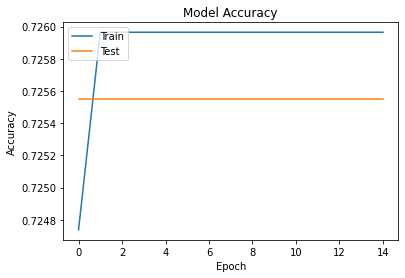

In [46]:
#Plot Model2's accuracy for train and test sets
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Third Iteration CNN Model Analysis: 
Analyzing results from this Model: The Accuracy for all epochs again seems to be around the same mark and does not seem to be improving. The accuracy for the validation set is the exact same across all epochs once again. We might need to test another model architecture to get better results than this. 

## Conclusion

The results from this project were not conclusive. For the 3 CNN models deployed, the first model had to be interrupted due to a tensorflow warning, that did not let it run. 
The second model provided an acceptable 72% accuracy, but the constant accuracy of the second model does demand further analysis. The Third CNN model also led to similar results with the Validation set accuracy. 

The models need to be further developed in order to identify if their are any corrections that must be made in the model architecture or the dataset. 